In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Define the data
data = {
    "Outlook": ["Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Sunny", "Rainy", "Overcast"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High"],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True],
    "Play Golf": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes"]
}

In [26]:
df = pd.DataFrame(data)

In [27]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [28]:
df.tail()

,Outlook,Temperature,Humidity,Windy,Play Golf
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes
10,Rainy,Mild,Normal,True,Yes
11,Overcast,Mild,High,True,Yes


In [29]:
df.shape

(12, 5)

In [30]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Windy            bool
Play Golf      object
dtype: object

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      12 non-null     object
 1   Temperature  12 non-null     object
 2   Humidity     12 non-null     object
 3   Windy        12 non-null     bool  
 4   Play Golf    12 non-null     object
dtypes: bool(1), object(4)
memory usage: 528.0+ bytes


In [32]:
df.describe().T

,count,unique,top,freq
Outlook,12,3,Rainy,5
Temperature,12,3,Mild,5
Humidity,12,2,High,6
Windy,12,2,False,7
Play Golf,12,2,Yes,8


In [33]:
df['Temperature'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [34]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [35]:
label_encode = LabelEncoder()
cols = [['Outlook', 'Temperature', 'Humidity', 'Windy']]
for col in cols:
    df[col] = df[col].apply(label_encode.fit_transform)

In [36]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play Golf
0,1,1,0,0,No
1,1,1,0,1,No
2,0,1,0,0,Yes
3,2,2,0,0,Yes
4,2,0,1,0,Yes


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      12 non-null     int64 
 1   Temperature  12 non-null     int64 
 2   Humidity     12 non-null     int64 
 3   Windy        12 non-null     int64 
 4   Play Golf    12 non-null     object
dtypes: int64(4), object(1)
memory usage: 612.0+ bytes


In [38]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play Golf      0
dtype: int64

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
dd = df.drop('Play Golf', axis=1)

Outlook


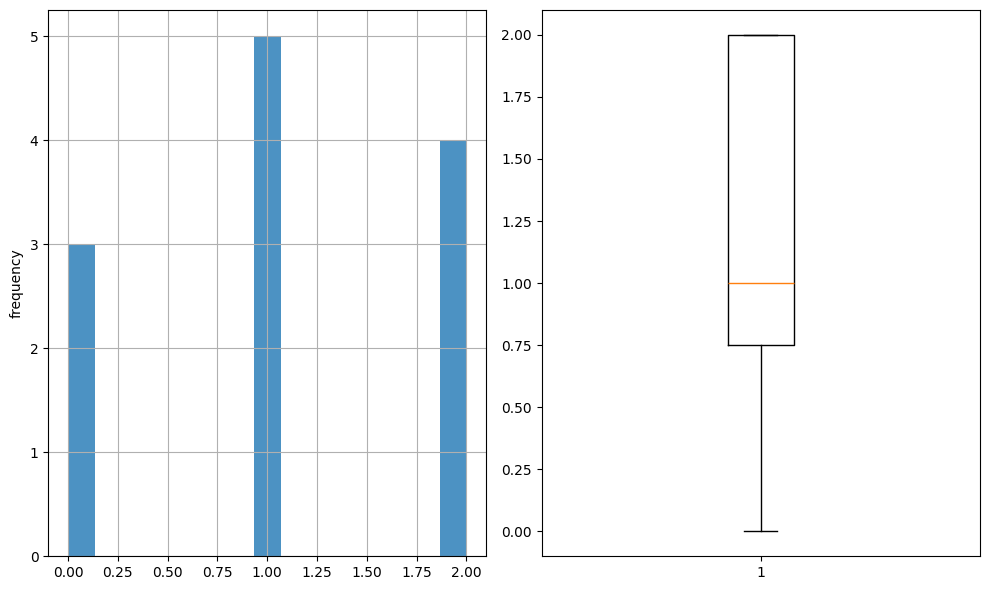

Temperature


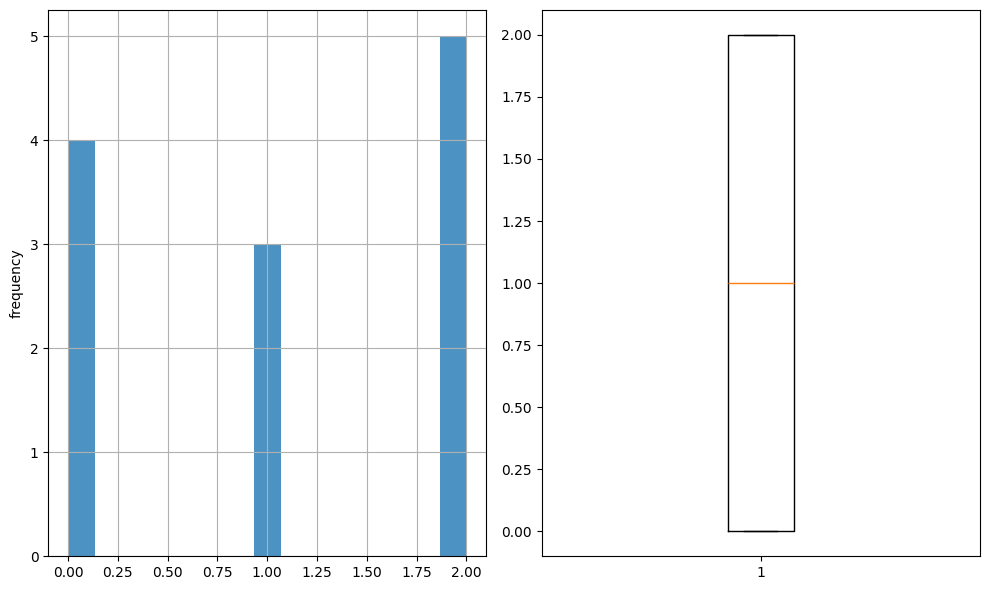

Humidity


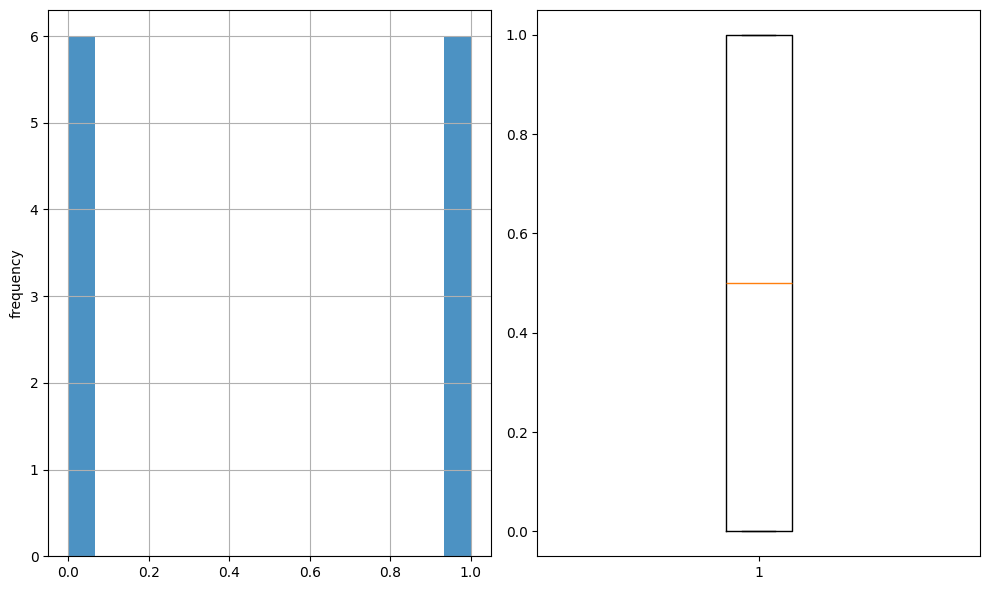

Windy


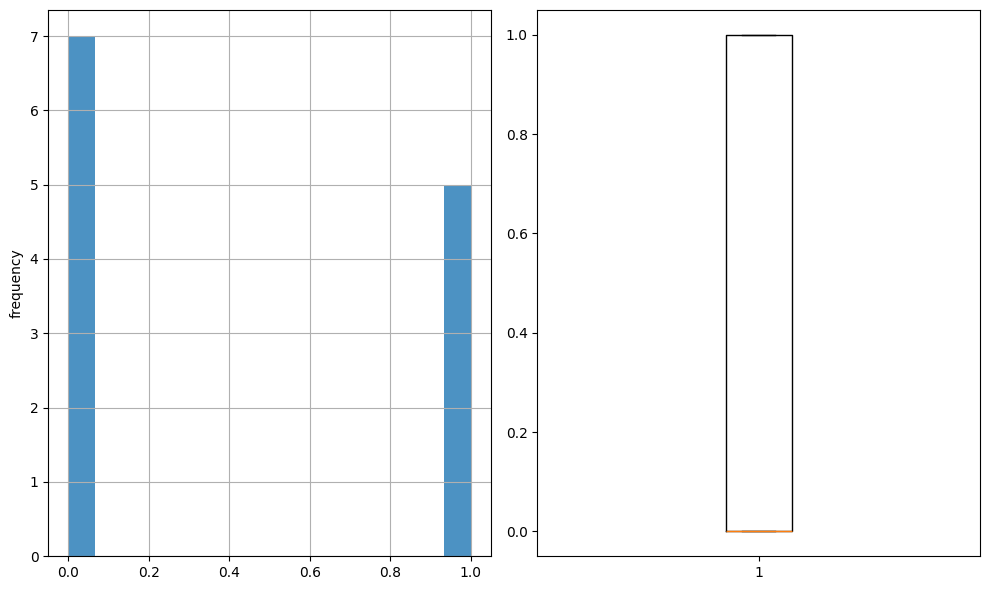

In [41]:
for col in dd:
    print(col)

    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[col].hist(bins=15,alpha=0.8)
    plt.ylabel('frequency')

    plt.subplot(1,2,2)
    plt.boxplot(x=df[col])

    plt.tight_layout()
    plt.show()
    

In [42]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [43]:
X = df.drop(columns=['Play Golf'],axis=1)
y = df['Play Golf']

In [44]:
X.head()

,Outlook,Temperature,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0


In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(9, 4)

In [47]:
X_train.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy'], dtype='object')

In [48]:
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play Golf'], dtype='object')

In [49]:
df.shape

(12, 5)

In [50]:
X_test

,Outlook,Temperature,Humidity,Windy
10,1,2,1,1
9,2,2,1,0
0,1,1,0,0


In [51]:
y_test

10    Yes
9     Yes
0      No
Name: Play Golf, dtype: object

In [52]:
classifier = GaussianNB()

classifier.fit(X_train,y_train)
classifier

GaussianNB()

In [53]:
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'Yes', 'Yes'], dtype='<U3')

In [54]:
accuracy = accuracy_score(y_test,y_pred)*100
print(f"accuracy:{accuracy:.4f}%")

accuracy:33.3333%


In [55]:
classification_report = classification_report(y_test,y_pred)
print('classification report:')
print(classification_report)

classification report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



In [56]:
X.head()

,Outlook,Temperature,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0


In [57]:
new = [(0,2,1,0)]
y_pred = classifier.predict(new)
y_pred

array(['Yes'], dtype='<U3')